In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
filename = '/content/drive/MyDrive/ml/data/Fraud.csv'
data = pd.read_csv(filename)

In [6]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
#(6362620, 11) -> 6362620 거래데이터, 11개 column
change_data = data[0:60000]
change_data

In [3]:
tmp = data['isFraud'].value_counts().to_frame().reset_index()
tmp['Percent(%)'] = tmp['isFraud'].apply(lambda x : round(100*float(x) / len(data), 2))
tmp = tmp.rename(columns = {"index" : "Target", "isFraud" : "Count"})

tmp

,Target,Count,Percent(%)
0,0,6354407,99.87
1,1,8213,0.13


In [ ]:
tmp = change_data['isFraud'].value_counts().to_frame().reset_index()
tmp['Percent(%)'] = tmp['isFraud'].apply(lambda x : round(100*float(x) / len(change_data), 2))
tmp = tmp.rename(columns = {"index" : "Target", "isFraud" : "Count"})

tmp

,Target,Count,Percent(%)
0,0,59896,99.83
1,1,104,0.17


In [ ]:
X_train = change_data.drop(["step", "isFraud", "isFlaggedFraud", "nameOrig", "nameDest"], axis=1)
Y_train = change_data.iloc[:, [9]]

In [ ]:
testing = Y_train.values
testing

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

encoding_columns=['type']
not_encoding_columns=['amount','oldbalanceOrg','newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

enc_classes={}
def encoding_label(x):
  le = LabelEncoder()
  le.fit(x)
  label=le.transform(x)

  enc_classes[x.name] = le.classes_

  return label

In [ ]:
d1 = X_train[encoding_columns].apply(encoding_label)
d2 = X_train[not_encoding_columns]
result = d1.join(d2)

In [ ]:
X_train_2 = result[0:48000]
X_test_2 = result[48000:60000]
Y_train_2 = Y_train[0:48000]
Y_test_2 = Y_train[48000:60000]

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)

#학습
knn.fit(X_train_2, Y_train_2)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
#예측
k_pred = knn.predict(X_test_2)
#정확도 출력

# print(str(sum(k_pred==Y_test_2)/len(Y_test_2)))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


[0.99933333 0.99933333 0.99933333 ... 0.99933333 0.99933333 0.99933333]


In [ ]:
col_name = ['isFraud']
list_df = pd.DataFrame(k_pred, columns=col_name)

In [ ]:
print(list_df)
print(Y_test_2)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(list_df, Y_test_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11990
           1       0.38      0.30      0.33        10

    accuracy                           1.00     12000
   macro avg       0.69      0.65      0.67     12000
weighted avg       1.00      1.00      1.00     12000



In [ ]:
g_tmp = data['isFraud'].value_counts().to_frame().reset_index()
g_tmp = g_tmp.drop(['index'], axis=1)
type(g_tmp)

pandas.core.frame.DataFrame

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

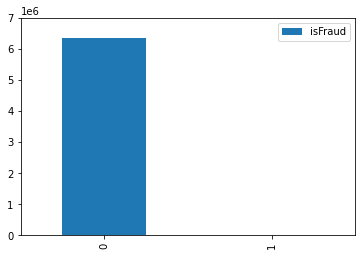

In [ ]:
g_tmp.plot.bar(ylim=([0,7000000]))

In [ ]:
data.isnull().sum().max()

0

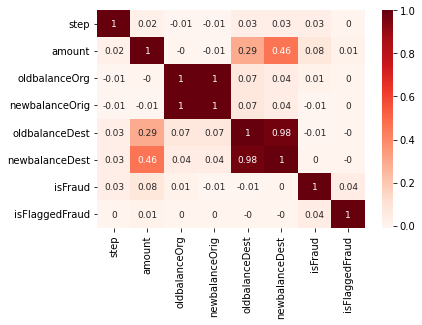

In [5]:
import seaborn as sns

corrdata = data.corr(method='pearson').round(2)
sns.heatmap(data=corrdata, annot=True, annot_kws={"size":9}, cmap='Reds')